In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [ ]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase'
case = np.array([1]) # Sill depth
hsr = np.array([0.04, 0.06, 0.08, 0.1, 0.12, 1])
gf, sw, se = 6, 120, 235 # index for cross-fjord sections 0, 1, 2

Cp = 3994  # Specific heat content J/kg/C
rho = 999.8 # Density

# Four-panel plot
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True, figsize=(10,5))
fig1.tight_layout()

for i in range(len(case)):

    file01 = xr.open_dataset(datapath+'/state_'+str(format(case[i],'03d')) + '.nc')
    file02 = xr.open_dataset(datapath+'/Adv_' + str(format(case[i],'03d')) + '.nc')
    file1 = file01.isel(T=~file01.get_index("T").duplicated())
    file2 = file02.isel(T=~file02.get_index("T").duplicated())
    state = file1.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(90,121))
    adv = file2.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(89,120))
 
    depth = state.Z.data
    uzx = state.U.data.mean(axis=(0,2))
    tzx = state.Temp.data.mean(axis=(0,2))
    szx = state.S.data.mean(axis=(0,2))
    advzx = adv.ADVx_TH.data.mean(axis=(0,2)) * Cp * rho
    
    temp = tzx[:,sw]
    temp[temp==0] = 'nan'
    sal = szx[:,sw]
    sal[sal==0] = 'nan'
    u = uzx[:,sw]
    advh = advzx[:,sw]
    
    

    # Temperature
    ax1.plot(temp,depth,'-',lw=1.5)
    #ax1.legend(loc='best', fontsize=12)
    ax1.set_ylabel(r'Depth [m] - Section 0',size = 15)
    ax1.set_ylim(-400,0)
    ax1.set_xlim(8.5,10.5)
    ax1.set_xlabel(r'Temperature [$^\circ C$]', size = 15)
    ax1.xaxis.set_label_position('top') # this moves the label to the top
    ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
    ax1.grid(ls='--', lw=.5)
    
    # Salinity
    ax2.plot(sal,depth,'-',lw=1.5)
    #ax2.legend(fontsize=15)
    ax2.set_xlabel(r'Salinity [$psu$]', size = 15)
    ax2.set_xlim(30,36)
    ax2.set_ylim(-400,0)
    ax2.xaxis.set_label_position('top') # this moves the label to the top
    ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax2.yaxis.set_visible(False) # This erases the y ticks
    ax2.grid(ls='--', lw=.5)
    
    # Horizontal velocity
    ax3.plot(u,depth,'-',lw=1.5)
    #ax3.legend(fontsize=15)
    ax3.axvline(x=0,color='k',linestyle=':')
    ax3.set_xlim(-0.2,0.2)
    ax3.set_ylim(-400,0)
    ax3.set_xlabel(r'U [$m/s$]', size = 15)
    ax3.xaxis.set_label_position('top') # this moves the label to the top
    ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax3.yaxis.set_visible(False) # This erases the y ticks
    ax3.grid(ls='--', lw=.5)
    
    # Horizontal advective heat flux
    ax4.plot(advh/1e9,depth,'-',lw=1.5,label=str(hsr[i]))
    ax4.axvline(x=0,color='k',linestyle=':')
    ax4.legend(title='$h_s/h$',loc='best',fontsize=12)
    ax4.set_xlabel(r'H [$\times 10^9~J/s$]', size = 15)
    ax4.set_xlim(-4,4)
    ax4.set_ylim(-400,0)    
    ax4.xaxis.set_label_position('top') # this moves the label to the top
    ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax4.yaxis.set_visible(False) # This erases the y ticks
    ax4.grid(ls='--', lw=.5)


In [ ]:
u

In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/profile_section0.png', dpi=300, bbox_inches='tight') 

In [ ]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
case = np.array([4, 3, 2, 1]) # Sill depth
gf, sw, se = 6, 120, 235 # index for cross-fjord sections 0, 1, 2

Cp = 3994  # Specific heat content J/kg/C
rho = 999.8 # Density

fig2 = plt.figure(figsize=(4,8))
fig2.tight_layout()  
ax1 = fig2.add_subplot(111)

for i in range(len(case)):

    file01 = xr.open_dataset(datapath+'/state_'+str(format(case[i],'03d')) + '.nc')
    file02 = xr.open_dataset(datapath+'/Adv_' + str(format(case[i],'03d')) + '.nc')
    file1 = file01.isel(T=~file01.get_index("T").duplicated())
    file2 = file02.isel(T=~file02.get_index("T").duplicated())
    state = file1.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(90,121))
    adv = file2.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(89,120))
 
    depth = state.Z.data
    uzx = state.U.data.mean(axis=(0,2))
    tzx = state.Temp.data.mean(axis=(0,2))
    szx = state.S.data.mean(axis=(0,2))
    advzx = adv.ADVx_TH.data.mean(axis=(0,2)) * Cp * rho
    
    temp = tzx[:,gf]
    temp[temp==0] = 'nan'
    sal = szx[:,gf]
    sal[sal==0] = 'nan'
    u = uzx[:,gf]
    advh = advzx[:,gf]
    
    
    # Horizontal advective heat flux
    ax1.plot(advh/1e9,depth,'-',lw=1.5,label=str(i+1)+r'$\frac{\partial s_0}{\partial z}$')
    ax1.axvline(x=0,color='k',linestyle=':')
    ax1.legend(loc='best',fontsize=15)
    ax1.set_xlabel(r'$H\;[\times 10^9~J/s]$ (Section 0)', size = 15)
    ax1.set_ylabel(r'Depth [m]',size = 15)
    #ax4.set_xlim(-4,4)
    ax1.set_ylim(-400,0)    
    ax1.xaxis.set_label_position('top') # this moves the label to the top
    ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax4.yaxis.set_visible(False) # This erases the y ticks
    ax1.grid(ls='--', lw=.5)


In [2]:
def Z_prof(datapath, case_id, time, xidx):
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    #Adv01 = xr.open_dataset(datapath + '/Adv_' + str(format(case_id,'03d')) + '.nc')    
    #Adv = Adv01.isel(T=~Adv01.get_index("T").duplicated())
    #adv = Adv.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    u = state.U.data.mean(2)
    depth = state.Z.data
    ux = u[time,:,xidx]
    
    temp = state.Temp.data[time,:,:,xidx].mean(1)
    
    mask = (temp == 0)
    temp[mask] = 'nan'
    
    S = state.S.data[time,:,:,xidx].mean(1)
    S[mask] = 'nan'
    
    ux[mask] = 'nan'
    
    areaW = grid.HFacW * grid.drF * grid.dyG
    Q = ux * areaW.data[:,:,xidx].mean(1)*10
    
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    #ADV = adv.ADVx_TH.data[time,:,:,xidx].mean(1) * Cp * rho
    
    return depth, temp, S, ux, Q

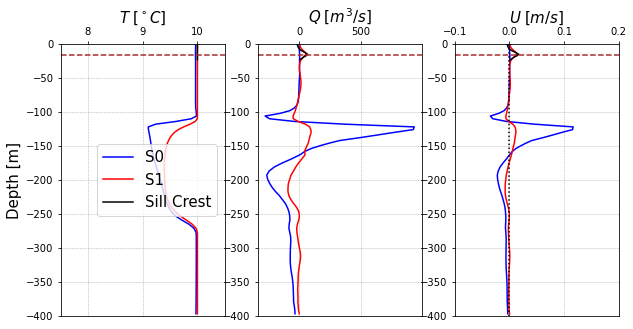

In [16]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
gf, sw, sc, se = 6, 120, 168, 235 # index for cross-fjord sections 0, 1, sill crest, 2

caseN = 1
t = 20
depth, temp1, S1, U1, Q1 = Z_prof(datapath, caseN, t, gf)
depth, temp2, S2, U2, Q2 = Z_prof(datapath, caseN, t, sw)
depth, temp3, S3, U3, Q3 = Z_prof(datapath, caseN, t, sc)
#depth, temp4, S4, U4, Q4 = Z_prof(datapath, caseN, t, se)



fig3 = plt.figure(figsize=(10,5))
fig3.tight_layout()  
ax1 = fig3.add_subplot(131)
ax1.plot(temp1,depth,'b-',lw=1.5,label=r'S0')
ax1.plot(temp2,depth,'r-',lw=1.5,label=r'S1')
ax1.plot(temp3,depth,'k-',lw=1.5,label=r'Sill Crest')
#ax1.plot(temp4,depth,'g-',lw=1.5,label=r'S2')

ax1.axhline(y=-16,color='brown',linestyle='--')
ax1.legend(loc='right',fontsize=15)
ax1.set_xlabel(r'$T\;[^\circ C]$', size = 15)
ax1.set_ylabel(r'Depth [m]',size = 15)
ax1.set_xlim(7.5,10.5)
ax1.set_ylim(-400,0)    
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(ls='--', lw=.5)

ax2 = fig3.add_subplot(132)
ax2.plot(Q1,depth,'b-',lw=1.5,label=r'S0')
ax2.plot(Q2,depth,'r-',lw=1.5,label=r'S1')
ax2.plot(Q3,depth,'k-',lw=1.5,label=r'Sill Crest')
#ax2.plot(Q4,depth,'g-',lw=1.5,label=r'S2')
ax2.axhline(y=-16,color='brown',linestyle='--')
#ax2.legend(loc='best',fontsize=15)
ax2.set_xlabel(r'$Q\;[m^3/s]$', size = 15)
#ax2.set_ylabel(r'Depth [m]',size = 15)
#ax2.set_xlim(15,35)
ax2.set_ylim(-400,0)    
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(ls='--', lw=.5)


ax3 = fig3.add_subplot(133)
ax3.plot(U1,depth,'b-',lw=1.5,label=r'S0')
ax3.plot(U2,depth,'r-',lw=1.5,label=r'S1')
ax3.plot(U3,depth,'k-',lw=1.5,label=r'Sill Crest')
#ax3.plot(U4,depth,'g-',lw=1.5,label=r'S2')
ax3.axvline(x=0,color='k',linestyle=':')
ax3.axhline(y=-16,color='brown',linestyle='--')
#ax3.legend(loc='best',fontsize=15)
ax3.set_xlabel(r'$U\;[m/s]$', size = 15)
#ax3.set_ylabel(r'Depth [m]',size = 15)
ax3.set_xlim(-0.1,0.2)
ax3.set_ylim(-400,0)    
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.grid(ls='--', lw=.5)


In [7]:
#Q1[Q1>0].sum() + Q1[Q1<0].sum(), Q2[Q2>0].sum() + Q2[Q2<0].sum(), Q3[Q3>0].sum() + Q3[Q3<0].sum()
#np.sum(Q1[Q1>0] * S1[Q1>0]) + np.sum(Q1[Q1<0] * S1[Q1<0]), np.sum(Q2[Q2>0] * S2[Q2>0]) + np.sum(Q2[Q2<0] * S2[Q2<0]), np.sum(Q3[Q3>0] * S3[Q3>0]) + np.sum(Q3[Q3<0] * S3[Q3<0])
state=xr.open_dataset(datapath+'/state_'+str(format(1,'03d')) + '.nc')
state.T

<xarray.DataArray 'T' (T: 121)>
array([      0.,   43200.,   86400.,  129600.,  172800.,  216000.,  259200.,
        302400.,  345600.,  388800.,  432000.,  475200.,  518400.,  561600.,
        604800.,  648000.,  691200.,  734400.,  777600.,  820800.,  864000.,
        907200.,  950400.,  993600., 1036800., 1080000., 1123200., 1166400.,
       1209600., 1252800., 1296000., 1339200., 1382400., 1425600., 1468800.,
       1512000., 1555200., 1598400., 1641600., 1684800., 1728000., 1771200.,
       1814400., 1857600., 1900800., 1944000., 1987200., 2030400., 2073600.,
       2116800., 2160000., 2203200., 2246400., 2289600., 2332800., 2376000.,
       2419200., 2462400., 2505600., 2548800., 2592000., 2635200., 2678400.,
       2721600., 2764800., 2808000., 2851200., 2894400., 2937600., 2980800.,
       3024000., 3067200., 3110400., 3153600., 3196800., 3240000., 3283200.,
       3326400., 3369600., 3412800., 3456000., 3499200., 3542400., 3585600.,
       3628800., 3672000., 3715200., 3758400., 3801600., 3844800., 3888000.,
       3931200., 3974400., 4017600., 4060800., 4104000., 4147200., 4190400.,
       4233600., 4276800., 4320000., 4363200., 4406400., 4449600., 4492800.,
       4536000., 4579200., 4622400., 4665600., 4708800., 4752000., 4795200.,
       4838400., 4881600., 4924800., 4968000., 5011200., 5054400., 5097600.,
       5140800., 5184000.])
Coordinates:
  * T        (T) float64 0.0 4.32e+04 8.64e+04 ... 5.098e+06 5.141e+06 5.184e+06
Attributes:
    long_name:  model_time
    units:      s

In [ ]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
state01 = xr.open_dataset(datapath + '/state_' + str(format(1,'03d')) + '.nc')
state01.T
#S2, S3

In [ ]:
# Plot U, T at different sections
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
gf, sw, sc, se = 6, 120, 178, 235
caseN = 4
t = 2
depth, temp1, S1, U1, Q1 = Z_prof(path1, caseN, t, gf)
depth, temp2, S2, U2, Q2 = Z_prof(path1, caseN, t, sw)
depth, temp3, S3, U3, Q3 = Z_prof(path1, caseN, t, sc)
depth, temp4, S4, U4, Q4 = Z_prof(path1, caseN, t, se)


In [ ]:
# Plot U, T at different sections
fig4 = plt.figure(figsize=(8,6))
fig4.tight_layout()  

ax1 = fig4.add_subplot(121)
ax1.plot(U1,depth,'b-',lw=1.5,label=r'S0')
ax1.plot(U2,depth,'r-',lw=1.5,label=r'S1')
ax1.plot(U3,depth,'k-',lw=1.5,label=r'Sc')
ax1.plot(U4,depth,'g-',lw=1.5,label=r'S2')
#ax1.axhline(y=-16,color='brown',linestyle=':') # Maximum sill depth
ax1.set_xlim(-0.25,0.25)
#ax1.set_xlim(-0.1,0.25)
ax1.set_ylim(-400,0) 
ax1.legend(title=r'U', loc='lower left', fontsize=12)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_ylabel(r'Depth [$m$]', size=15)
ax1.set_xlabel(r'U [$m\,s^{-1}$]', size=15)

ax2 = ax1.twiny()
ax2.plot(temp1,depth,'b--',lw=1.5,label=r'S0')
ax2.plot(temp2,depth,'r--',lw=1.5,label=r'S1')
ax2.plot(temp3,depth,'k--',lw=1.5,label=r'Sc')
ax2.plot(temp4,depth,'g--',lw=1.5,label=r'S2')
#ax2.axhline(y=-16,color='brown',linestyle='--')
ax2.set_xlim(7.5,10.1)
ax2.set_ylim(-400,0)
ax2.legend(title=r'T', loc='lower center', fontsize=12)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_xlabel(r'T [$^\circ C$]', size=15)

ax3 = fig4.add_subplot(122)
ax3.plot(U3,depth,'k-',lw=1.5,label=r'Sc')
ax3.axvline(x=0,color='k',lw=0.5)
ax3.set_ylabel(r'Depth [$m$]', size=15)
ax3.set_xlabel(r'U [$m\,s^{-1}$]', size=15)
ax3.set_xlim(-0.25,0.25)
#ax3.set_xlim(-0.1,0.25)
ax3.set_ylim(-16,0)
#ax3.legend(title=r'U', loc='best', fontsize=12)
ax3.tick_params(direction='in', labelsize=15)


ax4 = ax3.twiny()
ax4.plot(temp3,depth,'k--',lw=1.5,label=r'Sc')
#ax2.axhline(y=-16,color='brown',linestyle='--')
ax4.set_xlim(7.5,10.1)
ax4.set_ylim(-16,0)
#ax4.legend(title=r'T', loc='best', fontsize=12)
ax4.tick_params(direction='in', labelsize=15)

ax4.set_xlabel(r'T [$^\circ C$]', size=15)

# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig4.savefig(fig_path + '/4Sz-minhs_UT_d01.png', dpi=300, bbox_inches='tight') 